# 선형 회귀 모델의 손실 지형 시각화 예제

- by JPark, Gemini 2.5Flash
- 이 예제에서는 하나의 독립 변수 X와 하나의 종속 변수 Y를 가진 선형 회귀 모델 Y=WX+b를 가정합니다. 
- 이 모델의 손실 함수는 가중치 W와 편향 b에 대한 MSE입니다.

## 목표:

- 가상의 데이터셋 생성
- 선형 회귀 모델 정의 (여기서는 직접 손실 함수를 계산)
- W와 b 두 개의 파라미터에 대한 손실 지형을 3D 그래프와 등고선 그래프로 시각화

## 구현 : 

### 가상의 데이터셋 생성 (X_data, y_data):

- 선형 회귀 모델의 특성을 잘 보여주기 위해 실제 관계가 Y=2X+3이고 여기에 약간의 무작위 노이즈가 추가된 데이터를 생성했습니다.

### 손실 함수 정의 (mse_loss):

- **MSE(Mean Squared Error)**는 선형 회귀에서 가장 흔히 사용되는 손실 함수입니다. W와 b가 주어졌을 때, 예측 y_pred를 계산하고 실제 y_true와의 차이의 제곱 평균을 반환합니다.

### 손실 지형 계산을 위한 파라미터 공간 정의:

- W_values와 b_values: 손실 지형을 그릴 가중치(W)와 편향(b)의 범위를 np.linspace를 사용하여 정의합니다. 여기서 중요한 점은 실제 최적값(W=2, b=3)을 포함하는 충분히 넓은 범위를 설정하여 최소점을 볼 수 있도록 하는 것입니다. 50은 각 축의 해상도로, 숫자가 클수록 더 부드러운 지형을 얻지만 계산 시간이 길어집니다.

- np.meshgrid(W_values, b_values): W_values와 b_values의 모든 가능한 조합을 생성하여 2D 그리드를 만듭니다. W_grid, b_grid는 각각 그리드의 X, Y 좌표 역할을 합니다.

- loss_grid 계산: 중첩된 for 루프를 사용하여 W_grid와 b_grid의 모든 각 지점(W_val, b_val)에 대해 mse_loss 함수를 호출하고 그 결과를 loss_grid에 저장합니다. loss_grid는 손실 지형의 "높이"를 나타냅니다.

### 손실 지형 시각화:

- 3D 표면도: matplotlib.pyplot의 mpl_toolkits.mplot3d를 사용하여 3차원 그래프를 그립니다. plot_surface 함수에 W_grid, b_grid, loss_grid를 전달하여 손실 지형의 형태를 입체적으로 보여줍니다. cmap='viridis'는 색상 맵을 설정합니다.

- 등고선도: plt.contourf를 사용하여 손실 값의 높낮이를 색상으로 표현하는 등고선도를 그립니다. levels는 등고선의 개수를 지정합니다. plt.contour는 등고선 자체를 그려서 시각적인 명확성을 더합니다.

- 'True Optimal' 표시: 데이터 생성 시 사용한 실제 최적의 W와 b 값을 빨간색 점으로 표시하여 손실 지형의 가장 낮은 지점(최소점)이 어디인지 시각적으로 확인할 수 있도록 했습니다.

## 의의:
- 직관적인 이해: 선형 회귀는 손실 함수가 볼록하기 때문에, 3D 그래프와 등고선도를 통해 최소점이 하나만 존재하고 그 주변이 어떻게 변화하는지 명확하게 볼 수 있습니다. 이는 복잡한 딥러닝 모델의 비볼록(non-convex) 손실 지형을 이해하기 위한 기본적인 개념을 제공합니다.

- 파라미터의 영향 시각화: W와 b 값이 손실에 어떻게 영향을 미치는지 시각적으로 보여주어, 경사 하강법과 같은 최적화 알고리즘이 이 지형 위에서 어떻게 최소점을 찾아가는지 상상하는 데 도움을 줍니다.

- 확장 가능성: 이 기본적인 원리는 더 많은 파라미터와 복잡한 손실 함수를 가진 신경망에도 적용될 수 있습니다 (물론 고차원이 되어 2D/3D 시각화는 특정 단면을 투영하는 방식으로만 가능하지만요).



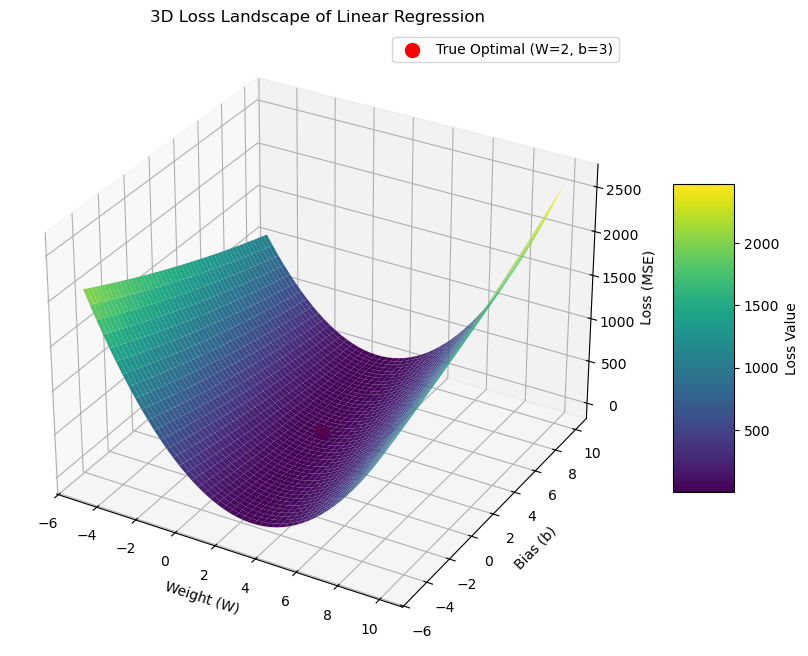

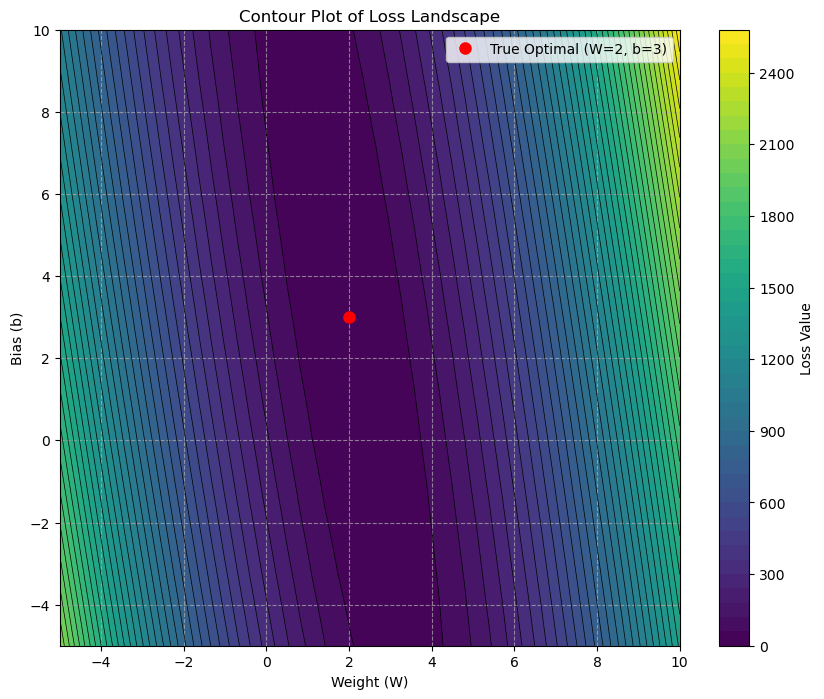

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# --- 1. 가상의 데이터셋 생성 ---
# 실제 데이터는 Y = 2X + 3 + noise 형태를 따른다고 가정
np.random.seed(42) # 재현성을 위해 시드 고정
X_data = np.random.rand(100, 1) * 10 # 0부터 10 사이의 100개 데이터 포인트
y_data = 2 * X_data + 3 + np.random.randn(100, 1) * 2 # 실제 W=2, b=3에 노이즈 추가

# --- 2. 손실 함수 (MSE) 정의 ---
# W(가중치)와 b(편향)에 대한 평균 제곱 오차(Mean Squared Error)
def mse_loss(W, b, X, y_true):
    y_pred = W * X + b # 예측값
    loss = np.mean((y_pred - y_true)**2) # MSE 계산
    return loss

# --- 3. 손실 지형 계산을 위한 파라미터 공간 정의 ---
# W와 b의 탐색 범위와 해상도 설정
# 실제 최적값 (W=2, b=3) 주변을 중심으로 탐색
W_values = np.linspace(-5, 10, 50) # W 값 범위 (예: -5부터 10까지 50단계)
b_values = np.linspace(-5, 10, 50) # b 값 범위 (예: -5부터 10까지 50단계)

# W와 b의 그리드 생성
W_grid, b_grid = np.meshgrid(W_values, b_values)

# 각 W, b 조합에 대한 손실 값 계산
loss_grid = np.zeros(W_grid.shape) # 손실 값을 저장할 배열 초기화

for i in range(W_grid.shape[0]):
    for j in range(W_grid.shape[1]):
        W_val = W_grid[i, j]
        b_val = b_grid[i, j]
        loss_grid[i, j] = mse_loss(W_val, b_val, X_data, y_data)

# --- 4. 손실 지형 시각화 ---

# 4.1. 3D 표면도 (3D Surface Plot)
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# 표면 그리기
surf = ax.plot_surface(W_grid, b_grid, loss_grid, cmap='viridis', edgecolor='none')

# 실제 최적값 표시 (여기서는 데이터를 생성한 W=2, b=3 지점)
ax.scatter(2, 3, mse_loss(2, 3, X_data, y_data), color='red', marker='o', s=100, label='True Optimal (W=2, b=3)')

ax.set_xlabel('Weight (W)')
ax.set_ylabel('Bias (b)')
ax.set_zlabel('Loss (MSE)')
ax.set_title('3D Loss Landscape of Linear Regression')
fig.colorbar(surf, shrink=0.5, aspect=5, label='Loss Value')
plt.legend()
plt.show()

# 4.2. 등고선도 (Contour Plot)
plt.figure(figsize=(10, 8))
contour = plt.contourf(W_grid, b_grid, loss_grid, levels=50, cmap='viridis') # 등고선 채우기
plt.colorbar(contour, label='Loss Value') # 컬러바 추가
plt.contour(W_grid, b_grid, loss_grid, levels=50, colors='black', linewidths=0.5) # 등고선 그리기 (선)

# 실제 최적값 표시
plt.plot(2, 3, 'ro', markersize=8, label='True Optimal (W=2, b=3)')

plt.xlabel('Weight (W)')
plt.ylabel('Bias (b)')
plt.title('Contour Plot of Loss Landscape')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()